theta = 10:


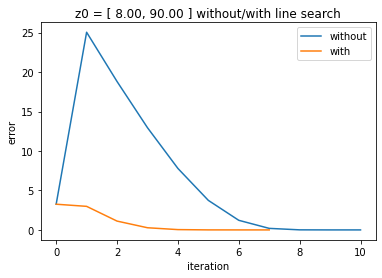

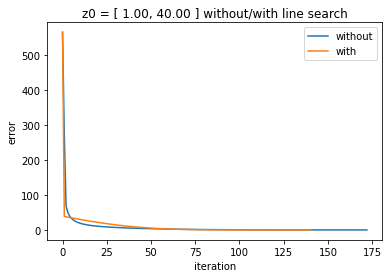

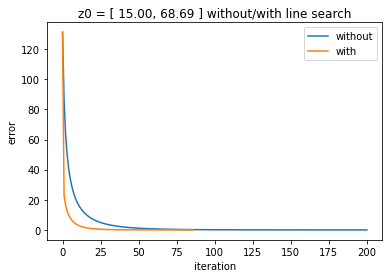

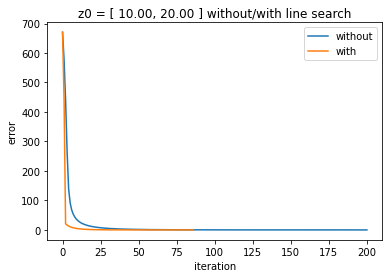

theta = 100:


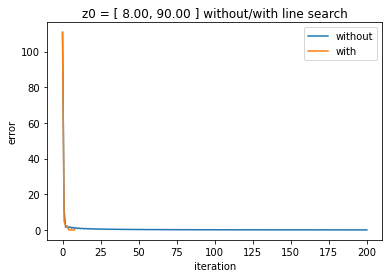

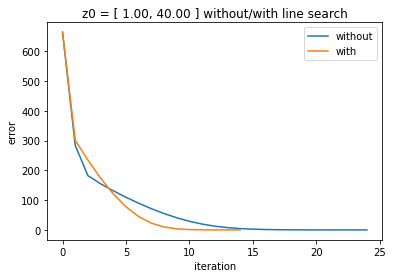

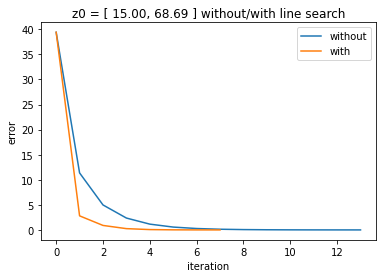

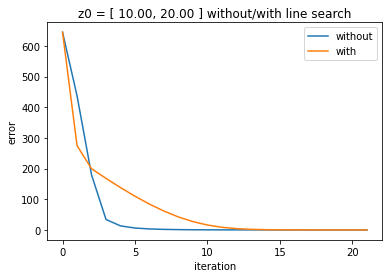

In [8]:
from matplotlib import pyplot as plt
from sympy import symbols, diff, log
import numpy as np
import sys


## Problem 2
# Define simple line search (Wolfe)
def line_search(x1, x2, f, z0, tolerance, alpha, line_search, beta, c1, c2, iter_max):
    # Initialise x1, x2 and f
    x1_value = z0[0]
    x2_value = z0[1]
    f_value = f.subs({x1: x1_value, x2: x2_value})

    # Store history of x1, x2 and f
    x1_his = x1_value  # history of value of all x1
    x2_his = x2_value  # history of value of all x2
    f_his = f_value  # history of value of all x2

    # Initialise 1st derivative of x1 and x2
    dfdx1_value = dfdx1.subs({x1: x1_value, x2: x2_value})
    dfdx2_value = dfdx2.subs({x1: x1_value, x2: x2_value})

    i = 0
    while ((abs(dfdx1_value) > tolerance) | (abs(dfdx2_value) > tolerance)) & (i < iter_max):
        # 1st order partial derivative
        dfdx1_value = dfdx1.subs({x1: x1_value, x2: x2_value})
        dfdx2_value = dfdx2.subs({x1: x1_value, x2: x2_value})

        # 2nd order partial derivative
        dfdx1dx1_value = dfdx1dx1.subs({x1: x1_value, x2: x2_value})
        dfdx1dx2_value = dfdx1dx2.subs({x1: x1_value, x2: x2_value})
        dfdx2dx1_value = dfdx2dx1.subs({x1: x1_value, x2: x2_value})
        dfdx2dx2_value = dfdx2dx2.subs({x1: x1_value, x2: x2_value})

        # Jacobin and Hessian matrix
        jac = np.array([dfdx1_value, dfdx2_value]).reshape(-1, 1).astype(float)
        h = np.array([[dfdx1dx1_value, dfdx1dx2_value], [dfdx2dx1_value, dfdx2dx2_value]]).astype(float)
        h_inv = np.linalg.inv(h)

        # Update delat x
        px1 = -np.dot(h_inv[0], jac).astype(float)
        px2 = -np.dot(h_inv[1], jac).astype(float)

        # check if x is infeasible
        infeasible = ((x1_value + alpha * px1)[0] < 0) | ((x2_value + alpha * px2)[0] < 0) | \
                     ((x1_value + alpha * px1)[0] + (x2_value + alpha * px2)[0] > 100) | \
                     ((x1_value + alpha * px1)[0] - (x2_value + alpha * px2)[0] > 50)
        if infeasible:
            sys.exit('infeasible points')
        
        # Wolfe conditions line search
        if line_search:
            wolfe = (f.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) >
                     f.subs({x1: x1_value, x2: x2_value}) + c1 * alpha * np.dot(jac.T, np.array([px1, px2]))) | \
                    ((abs(dfdx1.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) * px1 +
                          dfdx2.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) * px2)) <
                     (c2 * abs(np.dot(jac.T, np.array([px1, px2])))))
            while wolfe:
                alpha = beta * alpha
                wolfe = (f.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) >
                         f.subs({x1: x1_value, x2: x2_value}) + c1 * alpha * np.dot(jac.T, np.array([px1, px2]))) | \
                        ((abs(dfdx1.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) * px1 +
                              dfdx2.subs({x1: (x1_value + alpha * px1)[0], x2: (x2_value + alpha * px2)[0]}) * px2)) <
                         (c2 * abs(np.dot(jac.T, np.array([px1, px2])))))

        x1_value += (alpha * px1)[0]
        x2_value += (alpha * px2)[0]
        f_value = f.subs({x1: x1_value, x2: x2_value})
        x1_his = np.vstack((x1_his, x1_value))
        x2_his = np.vstack((x2_his, x2_value))
        f_his = np.vstack((f_his, f_value))
        i += 1

    return x1_value, x2_value, f_value, i, x1_his, x2_his, f_his


# ## theta = 10
# # Define variables, parameters and functions
print('theta = 10:')
x1, x2 = symbols('x1 x2')
theta = 10
f = -9 * x1 - 10 * x2 + theta * (-log(100 - x1 - x2) - log(x1) - log(x2) - log(50 - x1 + x2))

dfdx1 = diff(f, x1)
dfdx2 = diff(f, x2)
dfdx1dx1 = diff(diff(f, x1), x1)
dfdx1dx2 = diff(diff(f, x1), x2)
dfdx2dx1 = diff(diff(f, x2), x1)
dfdx2dx2 = diff(diff(f, x2), x2)

z0 = np.array([[8, 90], [1, 40], [15, 68.69], [10, 20]])
error_max = 1e-1
alphas_wo = (9.5e-1, 3.0e-2, 2.0e-2, 2.0e-2)
alphas_w = (9.5e-1, 6.0e-2, 5.0e-2, 5.0e-2)
betas = (9.0e-1, 9.0e-1, 9.0e-1, 9.0e-1)
c1s = (1e-3, 1e-3, 1e-3, 1e-3)
c2s = (1e-2, 1e-2, 1e-2, 1e-2)
iter_max = 200

res_without_his = ['x1', 'x2', 'f', 'iterations']
res_with_his = ['x1', 'x2', 'f', 'iterations']

# With(out) line search
for j in range(z0.shape[0]):
    res_without = line_search(x1, x2, f, z0[j], error_max, alphas_wo[j], 0, 0, 0, 0, iter_max)
    res_without_his = np.vstack((res_without_his, res_without[0: 4]))
    f_without_his = res_without[6]

    res_with = line_search(x1, x2, f, z0[j], error_max, alphas_w[j], 1, betas[j], c1s[j], c2s[j], iter_max)
    res_with_his = np.vstack((res_with_his, res_with[0: 4]))
    f_with_his = res_with[6]

    plt.plot(abs(f_without_his - f_without_his[-1]), label='without')
    plt.plot(abs(f_with_his - f_with_his[-1]), label='with')
    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title("z0 = [ %.2f, %.2f ] without/with line search" % (z0[j, 0], z0[j, 1]))
    plt.legend()
    plt.show()

## theta = 100
# Define variables, parameters and functions
print('theta = 100:')
x1, x2 = symbols('x1 x2')
theta = 100
f = -9 * x1 - 10 * x2 + theta * (-log(100 - x1 - x2) - log(x1) - log(x2) - log(50 - x1 + x2))

dfdx1 = diff(f, x1)
dfdx2 = diff(f, x2)
dfdx1dx1 = diff(diff(f, x1), x1)
dfdx1dx2 = diff(diff(f, x1), x2)
dfdx2dx1 = diff(diff(f, x2), x1)
dfdx2dx2 = diff(diff(f, x2), x2)

z0 = np.array([[8, 90], [1, 40], [15, 68.69], [10, 20]])
error_max = 1e-1
alphas_wo = (2, 3.0e-1, 3.0e-1, 2.2e-1)
alphas_w = (2.5, 5.0e-1, 5.0e-1, 4.2e-1)
betas = (9.0e-1, 9.0e-1, 9.0e-1, 9.0e-1)
c1s = (1e-3, 1e-3, 1e-3, 1e-3)
c2s = (1e-2, 1e-2, 1e-2, 1e-2)
iter_max = 200

res_without_his = ['x1', 'x2', 'f', 'iterations']
res_with_his = ['x1', 'x2', 'f', 'iterations']

# With(out) line search
for j in range(z0.shape[0]):
    res_without = line_search(x1, x2, f, z0[j], error_max, alphas_wo[j], 0, 0, 0, 0, iter_max)
    res_without_his = np.vstack((res_without_his, res_without[0: 4]))
    f_without_his = res_without[6]

    res_with = line_search(x1, x2, f, z0[j], error_max, alphas_w[j], 1, betas[j], c1s[j], c2s[j], iter_max)
    res_with_his = np.vstack((res_with_his, res_with[0: 4]))
    f_with_his = res_with[6]

    plt.plot(abs(f_without_his - f_without_his[-1]), label='without')
    plt.plot(abs(f_with_his - f_with_his[-1]), label='with')
    plt.xlabel('iteration')
    plt.ylabel('error')
    plt.title("z0 = [ %.2f, %.2f ] without/with line search" % (z0[j, 0], z0[j, 1]))
    plt.legend()
    plt.show()